# LHCb Particle Identification

The goal of this project is to create a model that identifies particles passing through the LHCb detector. The spectrometer is composed of many sub-detector systems such as: tracking system, Ring-Imaging Cherenkov (RICH) detectors, electromagnetic and hadronic calorimeters and muon chambers.

<img width=100% align="center" src="materials/LHCb_Detector.png"/>

The particles of interests are electrons, muons, kaons, pions. Particles that are different than the mentioned particles are called ghosts. Ghosts can also be a product of the detector noise.

<img width=50% align="center" src="materials/LHCb_PID.png"/>

#### List of the features:
Here, **Spd** stands for Scintillating Pad Detector, **Prs** - Preshower, **Ecal** - electromagnetic calorimeter, **Hcal** - hadronic calorimeter, **Brem** denotes traces of the particles that were deflected by detector.

- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost".
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

### Libraries
Importing essential libraries: numpy, pandas, matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Preview of The Data

Importing Monte Carlo dataset.

In [2]:
df = pd.read_csv('data\PID-dataset-subsample.csv')

In [3]:
df.columns

Index(['TrackP', 'TrackNDoFSubdetector2', 'BremDLLbeElectron', 'MuonLooseFlag',
       'FlagSpd', 'SpdE', 'EcalDLLbeElectron', 'DLLmuon', 'RICHpFlagElectron',
       'EcalDLLbeMuon', 'TrackQualitySubdetector2', 'FlagPrs', 'DLLelectron',
       'DLLkaon', 'EcalE', 'TrackQualityPerNDoF', 'DLLproton',
       'PrsDLLbeElectron', 'FlagRICH1', 'MuonLLbeBCK', 'FlagHcal',
       'EcalShowerLongitudinalParameter', 'Calo2dFitQuality', 'TrackPt',
       'TrackDistanceToZ', 'RICHpFlagPion', 'HcalDLLbeElectron',
       'Calo3dFitQuality', 'FlagEcal', 'MuonLLbeMuon', 'TrackNDoFSubdetector1',
       'RICHpFlagProton', 'RICHpFlagKaon', 'GhostProbability',
       'TrackQualitySubdetector1', 'Label', 'RICH_DLLbeBCK', 'FlagRICH2',
       'FlagBrem', 'HcalDLLbeMuon', 'TrackNDoF', 'RICHpFlagMuon',
       'RICH_DLLbeKaon', 'RICH_DLLbeElectron', 'HcalE', 'MuonFlag', 'FlagMuon',
       'PrsE', 'RICH_DLLbeMuon', 'RICH_DLLbeProton'],
      dtype='object')

In [4]:
df.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,4783.899908,15.0,0.992629,1.0,1.0,3.2,-0.753252,5.095674,1.0,-0.744993,...,25.0,1.0,-0.272898,-9.828998,23413.300773,1.0,1.0,0.000011,12.092303,-2.605698
1,21113.160174,16.0,-0.454772,1.0,1.0,3.2,-3.027843,14.091743,1.0,1.282079,...,28.0,1.0,-78.682187,8.813811,1612.774429,1.0,1.0,2.742716,4.840911,-53.067288
2,2004.359973,14.0,-0.060743,0.0,1.0,0.0,-2.723425,-0.000016,1.0,0.107044,...,27.0,0.0,-0.017021,-33.895621,-999.000000,0.0,0.0,0.000019,-0.000021,-0.000021
3,12877.429683,14.0,-0.638981,0.0,1.0,3.2,-3.283638,4.084645,1.0,0.079914,...,29.0,1.0,13.235793,9.094493,3562.783455,0.0,1.0,1.645638,1.392493,26.947293
4,73979.062493,18.0,0.484596,1.0,1.0,3.2,-2.441371,8.700628,1.0,0.936483,...,36.0,1.0,-2.929998,0.781402,2286.271726,1.0,1.0,2.742734,0.433102,0.430202


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TrackP                           60000 non-null  float64
 1   TrackNDoFSubdetector2            60000 non-null  float64
 2   BremDLLbeElectron                60000 non-null  float64
 3   MuonLooseFlag                    60000 non-null  float64
 4   FlagSpd                          60000 non-null  float64
 5   SpdE                             60000 non-null  float64
 6   EcalDLLbeElectron                60000 non-null  float64
 7   DLLmuon                          60000 non-null  float64
 8   RICHpFlagElectron                60000 non-null  float64
 9   EcalDLLbeMuon                    60000 non-null  float64
 10  TrackQualitySubdetector2         60000 non-null  float64
 11  FlagPrs                          60000 non-null  float64
 12  DLLelectron       

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TrackP,60000.0,16158.886431,27736.422398,1209.110000,4149.994995,8.082305e+03,17513.435045,2.427606e+06
TrackNDoFSubdetector2,60000.0,14.718950,4.061609,1.000000,13.000000,1.600000e+01,18.000000,2.700000e+01
BremDLLbeElectron,60000.0,-210.732368,407.603283,-999.000000,-0.638962,-5.423956e-01,-0.068678,4.791513e+00
MuonLooseFlag,60000.0,0.191417,0.393420,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00
FlagSpd,60000.0,0.852467,0.354640,0.000000,1.000000,1.000000e+00,1.000000,1.000000e+00
SpdE,60000.0,-145.235950,355.345921,-999.000000,0.000000,3.200000e+00,3.200000,3.200000e+00
EcalDLLbeElectron,60000.0,-183.960840,386.413286,-999.000000,-3.000643,-2.312398e+00,0.591859,4.341276e+00
DLLmuon,60000.0,-12.833432,105.642965,-999.000000,-5.719371,-1.979914e+00,1.671562,1.450883e+01
RICHpFlagElectron,60000.0,0.950233,0.217464,0.000000,1.000000,1.000000e+00,1.000000,1.000000e+00
EcalDLLbeMuon,60000.0,-184.139531,386.326632,-999.000000,-3.367627,-1.956076e+00,0.397512,2.153012e+00


In [7]:
df.isnull().sum()

TrackP                             0
TrackNDoFSubdetector2              0
BremDLLbeElectron                  0
MuonLooseFlag                      0
FlagSpd                            0
SpdE                               0
EcalDLLbeElectron                  0
DLLmuon                            0
RICHpFlagElectron                  0
EcalDLLbeMuon                      0
TrackQualitySubdetector2           0
FlagPrs                            0
DLLelectron                        0
DLLkaon                            0
EcalE                              0
TrackQualityPerNDoF                0
DLLproton                          0
PrsDLLbeElectron                   0
FlagRICH1                          0
MuonLLbeBCK                        0
FlagHcal                           0
EcalShowerLongitudinalParameter    0
Calo2dFitQuality                   0
TrackPt                            0
TrackDistanceToZ                   0
RICHpFlagPion                      0
HcalDLLbeElectron                  0
C

In [8]:
df.shape

(60000, 50)

## Initial Model
Creating a pipeline.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = df['Label']
X = df.drop('Label', axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [12]:
from sklearn.pipeline import make_pipeline

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [14]:
initial_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='none')
)

In [15]:
initial_model.fit(X_train, y_train)

D:\Programs\Software\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty='none'))])

### Model Performance

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, initial_model.predict(X_test)))

              precision    recall  f1-score   support

    Electron       0.82      0.87      0.84      1982
       Ghost       0.73      0.70      0.71      1986
        Kaon       0.60      0.57      0.58      2066
        Muon       0.86      0.85      0.86      1971
        Pion       0.63      0.72      0.68      1999
      Proton       0.62      0.56      0.59      1996

    accuracy                           0.71     12000
   macro avg       0.71      0.71      0.71     12000
weighted avg       0.71      0.71      0.71     12000



In [17]:
def performance(model):
    train_accuracy = np.round((model.predict(X_train) == y_train).mean()*100, 2)
    test_accuracy = np.round((model.predict(X_test) == y_test).mean()*100, 2)
    
    print(f'Train accuracy: {train_accuracy} %')
    print(f'Test accuracy: {test_accuracy} %')

In [18]:
performance(initial_model)

Train accuracy: 71.73 %
Test accuracy: 71.0 %


### Distribution
Let's visualize delta log-likehood for a particle candidate to be a background using information from RICH detectors.

In [19]:
plt.rcParams['figure.figsize'] = [16, 8]

In [20]:
columns = [
    "RICH_DLLbeElectron",
    "RICH_DLLbeProton",
    "RICH_DLLbeKaon",
    "RICH_DLLbeMuon",
    "RICH_DLLbeBCK"
]

In [21]:
def distribution(feature, target, bins=10):
    particles = np.unique(target)
    bins = np.linspace(feature.min(), feature.max(), bins + 1)
    for particle in particles:
        selection = (target == particle)
        plt.hist(feature[selection], bins=bins, label=particle, alpha=0.5)
    plt.legend()

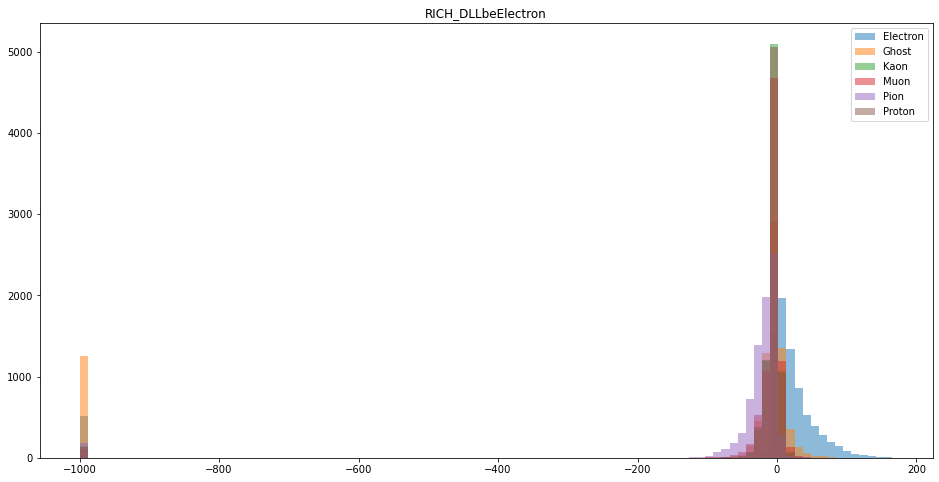

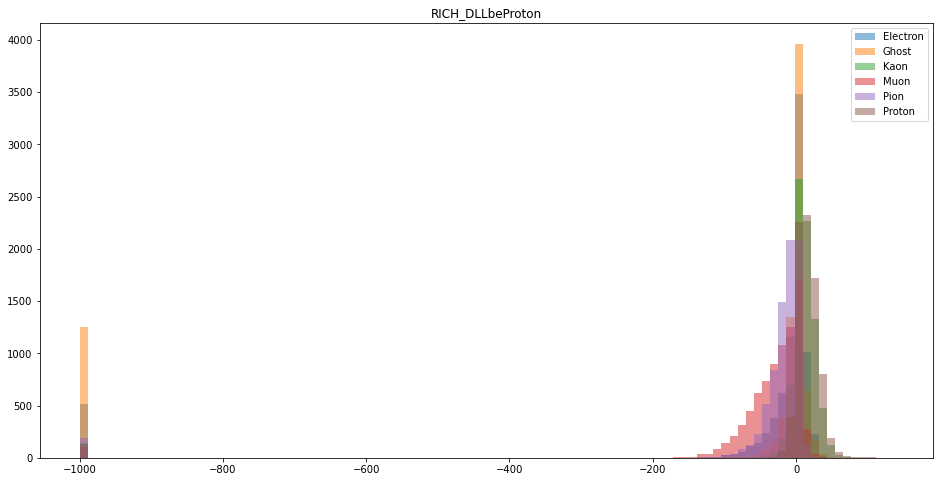

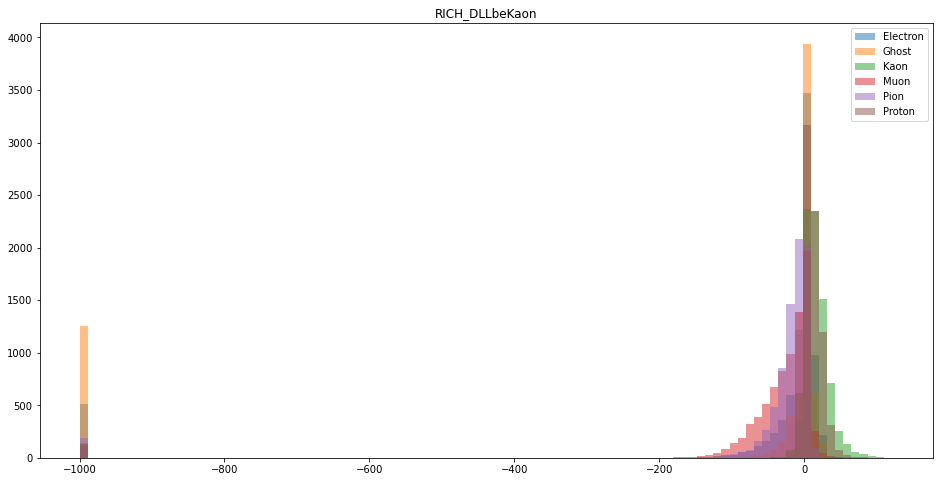

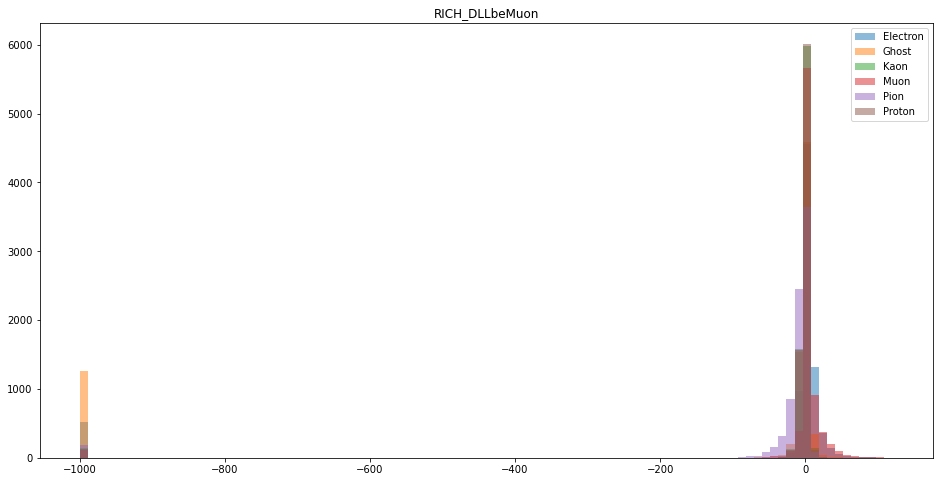

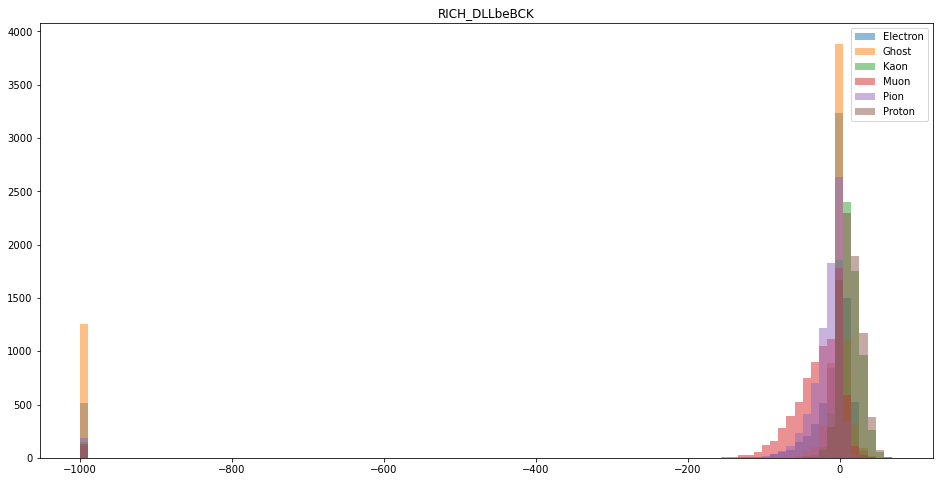

In [22]:
for column in columns:
    plt.figure()
    distribution(X_train[column], y_train, 100)
    plt.title(column)

As it can be seen, around -1000 there is a spike. It is the exit code. It would be beneficial to remove it to improve the performance of the data model.

In [23]:
df['RICH_DLLbeKaon'].min()

-999.0

In [24]:
from sklearn.base import TransformerMixin

In [25]:
class FeatureExpansion(TransformerMixin):
    def __init__(self, dll_threshold=-998):
        super().__init__()

        self.features = columns
        self.dll_threshold = dll_threshold

    def fit(self, X, y):
        self.mean_vals = [
            X[f][X[f] >= self.dll_threshold].mean()
            for f in self.features
        ]
        return self

    def transform(self, X):
        X = X.copy()
        
        for f, mean in zip(self.features, self.mean_vals):
            X[f][X[f] < self.dll_threshold] = mean
        
        return X

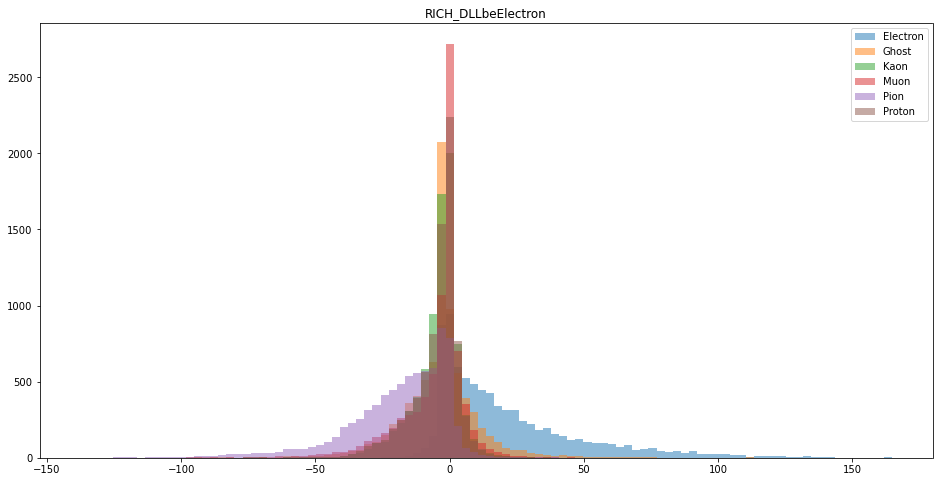

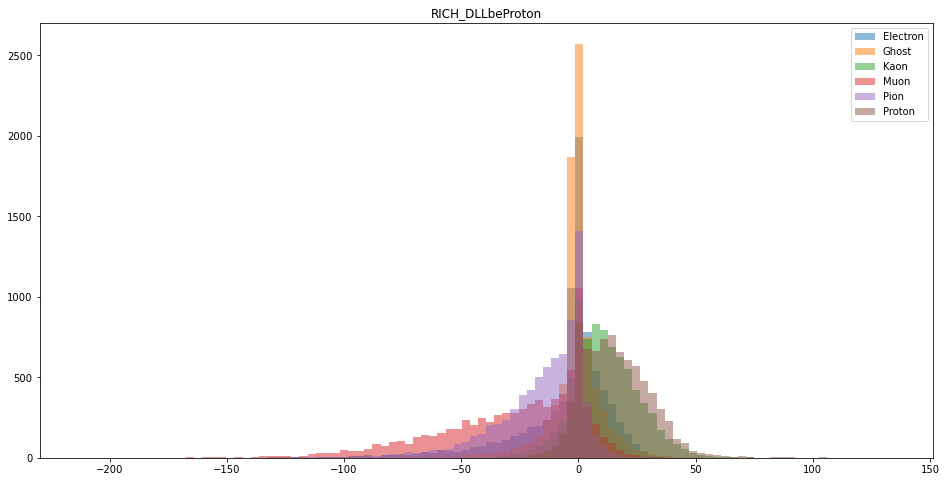

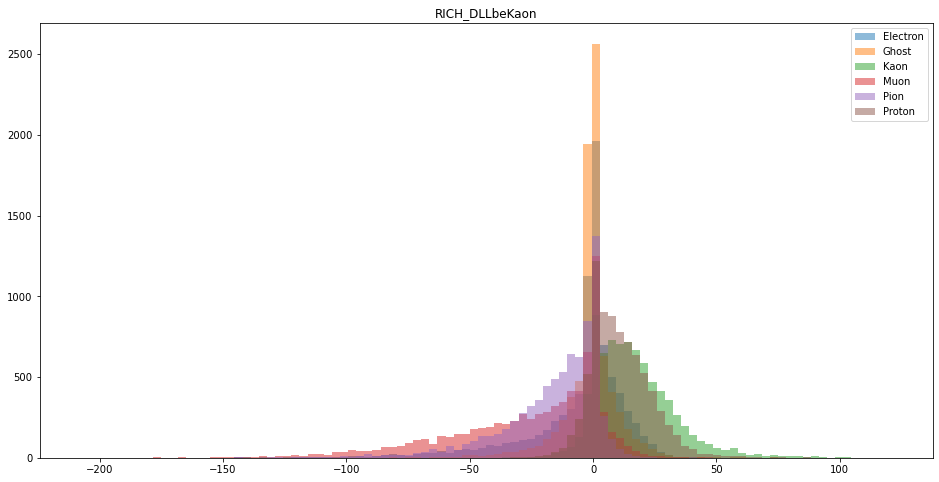

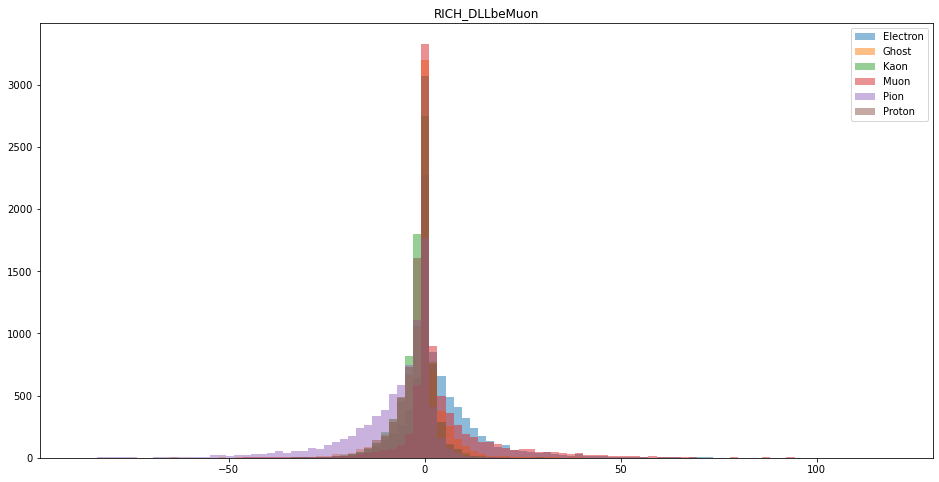

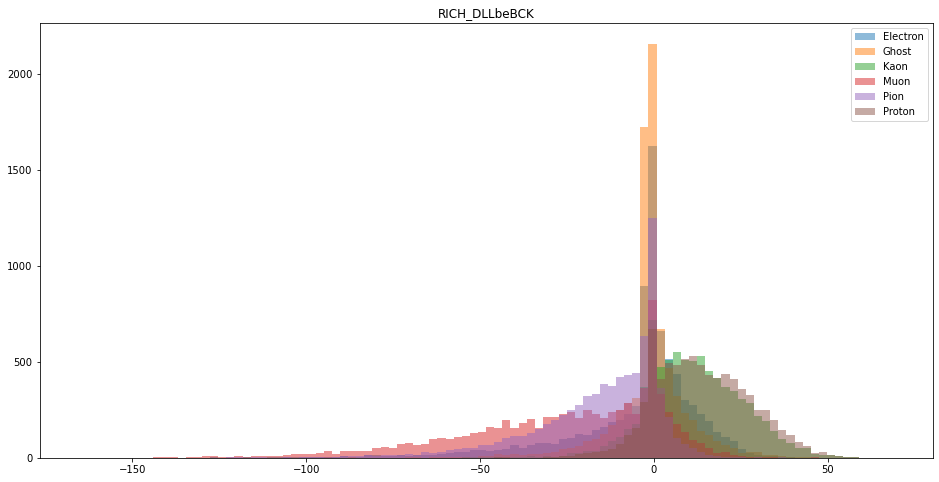

In [26]:
for column in columns:
    plt.figure()
    distribution(FeatureExpansion().fit_transform(X_train, y_train)[column], y_train, 100)
    plt.title(column)

### Improved Model
Let's build a model without the exit code.

In [27]:
improved_model = make_pipeline(
    FeatureExpansion(),
    StandardScaler(),
    LogisticRegression(penalty='none')
)
improved_model.fit(X_train, y_train)

D:\Programs\Software\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('featureexpansion',
                 <__main__.FeatureExpansion object at 0x000001C4CE0A5A90>),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty='none'))])

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, improved_model.predict(X_test)))

              precision    recall  f1-score   support

    Electron       0.82      0.89      0.85      1982
       Ghost       0.72      0.69      0.71      1986
        Kaon       0.61      0.57      0.59      2066
        Muon       0.86      0.87      0.87      1971
        Pion       0.67      0.74      0.70      1999
      Proton       0.62      0.55      0.59      1996

    accuracy                           0.72     12000
   macro avg       0.72      0.72      0.72     12000
weighted avg       0.72      0.72      0.72     12000



In [29]:
performance(improved_model)

Train accuracy: 72.76 %
Test accuracy: 71.88 %


In [30]:
def performance_difference(model2, model1):
    train_accuracy2 = (model2.predict(X_train) == y_train).mean()*100
    test_accuracy2 = (model2.predict(X_test) == y_test).mean()*100
    
    train_accuracy1 = (model1.predict(X_train) == y_train).mean()*100
    test_accuracy1 = (model1.predict(X_test) == y_test).mean()*100
    
    train_accuracy_improvement = np.round(train_accuracy2 - train_accuracy1, 2)
    test_accuracy_improvement = np.round(test_accuracy2 - test_accuracy1, 2)
    
    print(f'Train accuracy improvement: {train_accuracy_improvement} %')
    print(f'Test accuracy improvement: {test_accuracy_improvement} %')

In [31]:
performance_difference(improved_model, initial_model)

Train accuracy improvement: 1.03 %
Test accuracy improvement: 0.88 %


The improvement is about 1 %. To increasing even more, we could delete the exit code from the rest of the features.